In [14]:
import os
import subprocess
from glob import glob
from pathlib import Path


In [15]:

# === ROOT DIR ===
root_dir = "/home/ubuntu/work/slc_test_2_subset"
data_dir = os.path.join(root_dir, "data")
slc_dir = os.path.join(data_dir, "slcs")
dem_dir = os.path.join(data_dir, "dem")
orbit_dir = os.path.join(data_dir, "orbits")
aux_dir = os.path.join(data_dir, "aux")

# === CREATE DIRECTORIES ===
for path in [root_dir, slc_dir, dem_dir, orbit_dir, aux_dir]:
    os.makedirs(path, exist_ok=True)


In [3]:

# === SYMLINK SLC FILES FROM FIRST TEST STACK ===
source_slcs = sorted(glob("/home/ubuntu/work/slc_test_subset/S*SLC*.zip"))

for slc in source_slcs:
    link_name = os.path.join(slc_dir, os.path.basename(slc))
    if not os.path.exists(link_name):
        os.symlink(slc, link_name)
        print(f"Linked: {link_name}")


Linked: /home/ubuntu/work/slc_test_2_subset/data/slcs/S1A_IW_SLC__1SDV_20180101T170557_20180101T170624_019964_021FFD_CC7A.zip
Linked: /home/ubuntu/work/slc_test_2_subset/data/slcs/S1A_IW_SLC__1SDV_20180101T170622_20180101T170649_019964_021FFD_DC5A.zip
Linked: /home/ubuntu/work/slc_test_2_subset/data/slcs/S1A_IW_SLC__1SDV_20180101T170647_20180101T170714_019964_021FFD_C219.zip
Linked: /home/ubuntu/work/slc_test_2_subset/data/slcs/S1A_IW_SLC__1SDV_20180113T170557_20180113T170624_020139_022586_A166.zip
Linked: /home/ubuntu/work/slc_test_2_subset/data/slcs/S1A_IW_SLC__1SDV_20180113T170622_20180113T170649_020139_022586_FC76.zip
Linked: /home/ubuntu/work/slc_test_2_subset/data/slcs/S1A_IW_SLC__1SDV_20180113T170647_20180113T170714_020139_022586_21E1.zip


In [6]:
!tree -L 3 {root_dir}

/home/ubuntu/work/slc_test_2_subset
└── data
    ├── aux
    ├── dem
    ├── orbits
    └── slcs
        ├── S1A_IW_SLC__1SDV_20180101T170557_20180101T170624_019964_021FFD_CC7A.zip -> /home/ubuntu/work/slc_test_subset/S1A_IW_SLC__1SDV_20180101T170557_20180101T170624_019964_021FFD_CC7A.zip
        ├── S1A_IW_SLC__1SDV_20180101T170622_20180101T170649_019964_021FFD_DC5A.zip -> /home/ubuntu/work/slc_test_subset/S1A_IW_SLC__1SDV_20180101T170622_20180101T170649_019964_021FFD_DC5A.zip
        ├── S1A_IW_SLC__1SDV_20180101T170647_20180101T170714_019964_021FFD_C219.zip -> /home/ubuntu/work/slc_test_subset/S1A_IW_SLC__1SDV_20180101T170647_20180101T170714_019964_021FFD_C219.zip
        ├── S1A_IW_SLC__1SDV_20180113T170557_20180113T170624_020139_022586_A166.zip -> /home/ubuntu/work/slc_test_subset/S1A_IW_SLC__1SDV_20180113T170557_20180113T170624_020139_022586_A166.zip
        ├── S1A_IW_SLC__1SDV_20180113T170622_20180113T170649_020139_022586_FC76.zip -> /home/ubuntu/work/slc_test_subset/S1A_IW_SLC

In [9]:

# === DOWNLOAD DEM ===
# DEM Bounding box based on previous DEM: N45–46, E11–12
bbox = [45, 46, 11, 12]
dem_url = "https://e4ftl01.cr.usgs.gov/MEASURES/SRTMGL1.003/2000.02.11/"

dem_command = [
    "dem.py",
    "-a", "stitch",
    "-b", str(bbox[0]), str(bbox[1]), str(bbox[2]), str(bbox[3]),
    "-s", "1",
    "-c", "-r",
    "-d", dem_dir,
    "-u", dem_url
]
print("Command to run dem.py:", " ".join(dem_command))

subprocess.run(dem_command, check=True, cwd=dem_dir)
'''
dem.py -a stitch -b 45 46 11 12 -s 1 -c -r -u https://e4ftl01.cr.usgs.gov/MEASURES/SRTMGL1.003/2000.02.11/
'''

Command to run dem.py: dem.py -a stitch -b 45 46 11 12 -s 1 -c -r -d /home/ubuntu/work/slc_test_2_subset/data/dem -u https://e4ftl01.cr.usgs.gov/MEASURES/SRTMGL1.003/2000.02.11/
This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
curl -n  -L -c $HOME/.earthdatacookie -b $HOME/.earthdatacookie -k -f -O https://e4ftl01.cr.usgs.gov/MEASURES/SRTMGL1.003/2000.02.11/N45E011.SRTMGL1.hgt.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 9236k  100 9236k    0     0  4603k      0  0:00:02  0:00:02 --:--:-- 4604k


API open (R): /home/ubuntu/work/slc_test_2_subset/data/dem/demLat_N45_N46_Lon_E011_E012.dem
API close:  /home/ubuntu/work/slc_test_2_subset/data/dem/demLat_N45_N46_Lon_E011_E012.dem
Writing geotrans to VRT for /home/ubuntu/work/slc_test_2_subset/data/dem/demLat_N45_N46_Lon_E011_E012.dem
GDAL open (R): /home/ubuntu/work/slc_test_2_subset/data/dem/demLat_N45_N46_Lon_E011_E012.dem.vrt
API open (WR): demLat_N45_N46_Lon_E011_E012.dem.wgs84

    << Geoid Correction I2 SRTM>>

Jet Propulsion Laboratory - Radar Science and Engineering


Sampling Geoid at grid points -  Longitude Samples:    13 Latitude Lines:    13
Corner Geoid Heights (m) =   42.40  39.77  49.72  48.52

Correcting data to geoid height...

At line:      512
At line:     1024
At line:     1536
At line:     2048
At line:     2560
At line:     3072
At line:     3584
GDAL close: /home/ubuntu/work/slc_test_2_subset/data/dem/demLat_N45_N46_Lon_E011_E012.dem.vrt
API close:  demLat_N45_N46_Lon_E011_E012.dem.wgs84
API open (R): demLat_

'\ndem.py -a stitch -b 45 46 11 12 -s 1 -c -r -u https://e4ftl01.cr.usgs.gov/MEASURES/SRTMGL1.003/2000.02.11/\n'

In [14]:
# Paths (already defined)


granules = [f.stem for f in Path(slc_dir).glob("S1*SLC*.zip")]
print(f"Found {len(granules)} granules to fetch orbits for...")
print("Granules:", granules)



Found 6 granules to fetch orbits for...
Granules: ['S1A_IW_SLC__1SDV_20180113T170647_20180113T170714_020139_022586_21E1', 'S1A_IW_SLC__1SDV_20180101T170622_20180101T170649_019964_021FFD_DC5A', 'S1A_IW_SLC__1SDV_20180113T170622_20180113T170649_020139_022586_FC76', 'S1A_IW_SLC__1SDV_20180101T170647_20180101T170714_019964_021FFD_C219', 'S1A_IW_SLC__1SDV_20180113T170557_20180113T170624_020139_022586_A166', 'S1A_IW_SLC__1SDV_20180101T170557_20180101T170624_019964_021FFD_CC7A']


In [17]:
# === FETCH ORBITS ===
# Loop through granules and fetch orbits
for granule in granules:
    try:
        print(f"Fetching orbit for: {granule}")
        subprocess.run(["fetchOrbit.py", "-i", granule, "-o", str(orbit_dir)], check=True, cwd=orbit_dir)
    except subprocess.CalledProcessError as e:
        print(f"Failed to fetch orbit for {granule}: {e}")


Fetching orbit for: S1A_IW_SLC__1SDV_20180113T170647_20180113T170714_020139_022586_21E1
Reference time:  2018-01-13 17:07:14
Satellite name:  S1A
generating a new access token
Fetching orbit for: S1A_IW_SLC__1SDV_20180101T170622_20180101T170649_019964_021FFD_DC5A
Reference time:  2018-01-01 17:06:49
Satellite name:  S1A
using saved access token
Fetching orbit for: S1A_IW_SLC__1SDV_20180113T170622_20180113T170649_020139_022586_FC76
Reference time:  2018-01-13 17:06:49
Satellite name:  S1A
using saved access token
Fetching orbit for: S1A_IW_SLC__1SDV_20180101T170647_20180101T170714_019964_021FFD_C219
Reference time:  2018-01-01 17:07:14
Satellite name:  S1A
using saved access token
Fetching orbit for: S1A_IW_SLC__1SDV_20180113T170557_20180113T170624_020139_022586_A166
Reference time:  2018-01-13 17:06:24
Satellite name:  S1A
using saved access token
Fetching orbit for: S1A_IW_SLC__1SDV_20180101T170557_20180101T170624_019964_021FFD_CC7A
Reference time:  2018-01-01 17:06:24
Satellite name:

In [31]:
import subprocess

aux_dir = os.path.join(data_dir, "aux")
os.makedirs(aux_dir, exist_ok=True)

# Your working link
url = "https://sar-mpc.eu/download/ca97845e-1314-4817-91d8-f39afbeff74d/"
output_filename = "S1A_AUX_CAL_V20140908T000000_G20190626T100201.SAFE.zip"

# Run wget
subprocess.run(["wget", "-O", os.path.join(aux_dir, output_filename), url], check=True, cwd=aux_dir)


--2025-06-01 11:07:26--  https://sar-mpc.eu/download/ca97845e-1314-4817-91d8-f39afbeff74d/
Resolving sar-mpc.eu (sar-mpc.eu)... 80.158.79.117
Connecting to sar-mpc.eu (sar-mpc.eu)|80.158.79.117|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://obs.eu-nl.otc.t-systems.com/s1ece-archive/s1website/S1A/AUX_CAL/2014/09/08/S1A_AUX_CAL_V20140908T000000_G20190626T100201.SAFE.zip?AWSAccessKeyId=7PYDZV82ULYHYP81PHWO&Signature=GBPv59alY0HDzEyZ%2BLjGsClcxm0%3D&Expires=1748768966 [following]
--2025-06-01 11:07:26--  https://obs.eu-nl.otc.t-systems.com/s1ece-archive/s1website/S1A/AUX_CAL/2014/09/08/S1A_AUX_CAL_V20140908T000000_G20190626T100201.SAFE.zip?AWSAccessKeyId=7PYDZV82ULYHYP81PHWO&Signature=GBPv59alY0HDzEyZ%2BLjGsClcxm0%3D&Expires=1748768966
Resolving obs.eu-nl.otc.t-systems.com (obs.eu-nl.otc.t-systems.com)... 164.30.66.18, 164.30.67.20, 164.30.65.18, ...
Connecting to obs.eu-nl.otc.t-systems.com (obs.eu-nl.otc.t-systems.com)|164.30.66.18|:443... connecte

CompletedProcess(args=['wget', '-O', '/home/ubuntu/work/slc_test_2_subset/data/aux/S1A_AUX_CAL_V20140908T000000_G20190626T100201.SAFE.zip', 'https://sar-mpc.eu/download/ca97845e-1314-4817-91d8-f39afbeff74d/'], returncode=0)

Reading DEM from: /home/ubuntu/work/slc_test_2_subset/data/dem/demLat_N45_N46_Lon_E011_E012.dem.wgs84
DEM Min: 31
DEM Max: 2366


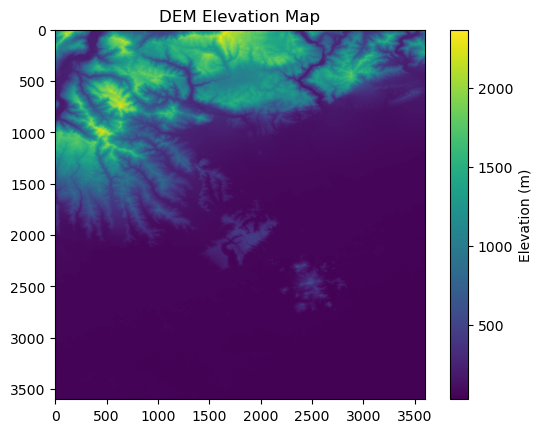

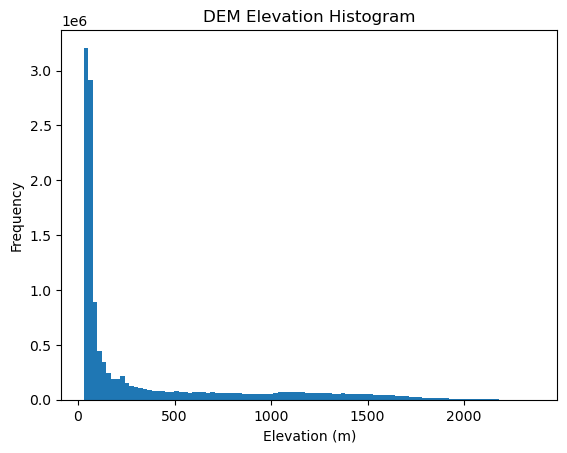

In [27]:


import xarray as xr
import rasterio
import matplotlib.pyplot as plt
import numpy as np
dem_path = "/home/ubuntu/work/slc_test_2_subset/data/dem/demLat_N45_N46_Lon_E011_E012.dem.wgs84"

print(f"Reading DEM from: {dem_path}")





with rasterio.open(dem_path) as src:
    data = src.read(1)  # read first band
    da = xr.DataArray(data)
print("DEM Min:", np.nanmin(data))
print("DEM Max:", np.nanmax(data))

plt.imshow(da, aspect=1)
plt.title(dem_path)
plt.colorbar(label="Elevation (m)")
plt.title("DEM Elevation Map")
plt.show()

plt.show()


plt.hist(data.ravel(), bins=100)
plt.title("DEM Elevation Histogram")
plt.xlabel("Elevation (m)")
plt.ylabel("Frequency")
plt.show()

In [12]:
import subprocess

cmd = [
    "stackSentinel.py",
    "--num_proc", "20",
    "--num_proc4topo", "4",
    "-s", slc_dir,
    "-d", "/home/ubuntu/work/slc_test_2_subset/data/dem/demLat_N45_N46_Lon_E011_E012.dem.wgs84",
    "-a", aux_dir,
    "-o", orbit_dir,
    "-b", "45 46 11 12",  # from your DEM bounding box
    "-c", "all",
    "-w", root_dir,
]

result = subprocess.run(cmd, cwd=root_dir, capture_output=True, text=True)
print("STDOUT:\n", result.stdout)
print("STDERR:\n", result.stderr)



STDOUT:
 This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
Number of SAFE files found: 6
Number of SAFE files to be used (cover BBOX): 4
*****************************************
Number of dates : 2
List of dates : 
['20180101', '20180113']
date      south      north
20180101 43.876049 47.381092
20180113 43.876366 47.381321
*****************************************
The overlap region among all dates (based on the preview kml files):
 South   North   East  West 
43.876366 47.381092 9.47961 13.487411
*****************************************
All dates (2)
['20180101', '20180113']

dates covering the bbox (2)
['20180101', '2

In [13]:
print(root_dir)
!cd {root_dir} 
!tree -L 4 {root_dir} 

/home/ubuntu/work/slc_test_2_subset
/home/ubuntu/work/slc_test_2_subset
├── ESD
│   └── 20180101_20180113
│       ├── IW1
│       │   ├── combined.cor
│       │   ├── combined.cor.vrt
│       │   ├── combined.cor.xml
│       │   ├── combined.int
│       │   ├── combined.int.vrt
│       │   ├── combined.int.xml
│       │   ├── combined.off
│       │   ├── combined.off.vrt
│       │   ├── combined.off.xml
│       │   ├── combined_freq.bin
│       │   ├── combined_freq.bin.vrt
│       │   ├── combined_freq.bin.xml
│       │   ├── freq_01.5alks_15rlks.bin
│       │   ├── freq_01.5alks_15rlks.bin.vrt
│       │   ├── freq_01.5alks_15rlks.bin.xml
│       │   ├── freq_01.bin
│       │   ├── freq_01.bin.vrt
│       │   ├── freq_01.bin.xml
│       │   ├── freq_02.5alks_15rlks.bin
│       │   ├── freq_02.5alks_15rlks.bin.vrt
│       │   ├── freq_02.5alks_15rlks.bin.xml
│       │   ├── freq_02.bin
│       │   ├── freq_02.bin.vrt
│       │   ├── freq_02.bin.xml
│       │   ├── freq_03.5alks_15rlks.